<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg"></img>
<center>
<p>
<h1>Algorísmica Avançada</h1>
<h2>Práctica 2: Greedy</h2>
</center>
</p>
</div>

<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>Minimum Spanning Tree</p></h2>
  <p>
Dado un grafo conexo y no dirigido, un minimum spanning tree de ese grafo es un subgrafo que tiene que ser un árbol y contener todos los vértices del grafo inicial. Cada arista tiene asignado un peso proporcional entre ellos, que es un número representativo de algún objeto, distancia, etc.; y se usa para asignar un peso total al MST computando la suma de todos los pesos de las aristas del árbol en cuestión. Un MST o un árbol expandido mínimo es un árbol recubridor que pesa menos o igual que otros árboles recubridores. Todo grafo tiene un bosque recubridor mínimo.
  </p>
  <p>
      En esta práctica se plantea la implementación del algoritmo de Prim para encontrar el arbol de expansión mínima en el metro de Londres.
  </p>
  </div>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center>
<p>
<h3>INPUT</h3>
<ul>
<li>__G__: El grafo del metro de londres.</li>
</ul>
<br>
<h3>OUTPUT</h3>

<ul>
<li>
__tree__: Objeto de tipo `Graph` que contenga el MST del grafo inical.
</li>
<ul>

</p>
</div>


In [1]:
import random

def prim(G, origin=None):
    """ Implementación del algoritmo de Prim para obtener el MST de un grafo cualquiera.
    Args:
        G (Graph): El grafo de tipo Graph sobre el que queremos buscar los componentes conexos
    Returns:
        tree: El grafo de tipo Graph que contiene el arbol de expansión mínima.
    """
    
    visited = []
    tree = nx.Graph()
    
    # Comprovació si hi ha origen o hem de triar aleatòriament
    if origin:
        currentNode = origin
    else:
        currentNode = random.choice(list(G.nodes()))
    
    # Posem totes les aristes del node origen en una cua prioritària, per tal de comparar
    # i triar el mínim i aconseguir el següent node a visitar "neighbor" amb format
    # [distància, (nodeActual, veï)]
    priorityQueue = [[G[currentNode][neighbor]['distance'], (currentNode, neighbor)]\
                     for neighbor in G.neighbors(currentNode)]
    visited.append(currentNode)
    
    # Mentre el nombre de nodes visitats no sigui la carnidalitat de V
    while len(visited) < len(G.nodes()):
        
        # Hem de treure la arista minima i afegir al tree
        currentEdge = min(priorityQueue)
        priorityQueue.remove(currentEdge)
        
        # Node actual, pot repetir-se en totes les iteracions
        currentNode = currentEdge[1][1]
        
        # Veïns que no tornen a un node visitat, perquè poden produïr un cicle
        neighborsNotVisited = [neighbor for neighbor in G.neighbors(currentNode) if neighbor not in visited]
        
        # S'afegeixen les aristes encara no comparades
        for node in neighborsNotVisited:
            priorityQueue.append([G[currentNode][node]['distance'], (currentNode, node)])
        
        # Si no es produeixen cicles, llavors afegim una nova arista
        if currentNode not in visited:
            tree.add_edge(currentEdge[1][0], currentEdge[1][1], distance=currentEdge[0])
            visited.append(currentNode)
    
    return tree

<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Tests </h3></p> </center>
<p>
Realiza los tests pertinentes en las celdas dispuestas a continuación.
</p>
</div>


In [2]:
import networkx as nx
from util import get_subway_graph, draw_subway_graph
from graph import Graph

G = Graph()
G, lines = get_subway_graph('csv', Graph)

F = prim(G, 1)

print("Aristes al nostre graf: " + str(len(F.edges())))
print("Nodes al nostre graf: " + str(len(F.nodes())))
print("Nodes originals: " + str(len(G.nodes())))

Aristes al nostre graf: 305
Nodes al nostre graf: 306
Nodes originals: 306


<div class="alert alert-warning" style="width:100%; margin:0 auto; padding">
<center><p><h3>Altres Tests </h3></p> </center>
<p>
Altres proves amb un altre graf més simple de la llibreria networkx
</p>
</div>

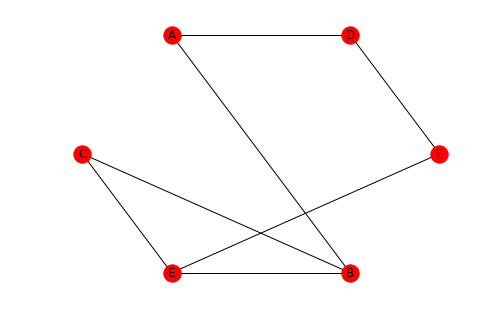

In [3]:
# ALTRES PROVES amb un altre graf més simple de la llibreria networkx

# Creació del graf

%matplotlib inline
import networkx as nx
G = nx.Graph()
G.add_edges_from([('A','B',{'distance': 3}),('A','D',{'distance': 2}),('D','F',{'distance': 17})\
                  ,('B','E',{'distance': 5}),('B','C',{'distance': 4}),('E','C',{'distance': 10})\
                  ,('E','F',{'distance': 1})])
nx.draw_circular(G, with_labels=True)

[1, ('F', 'E')]
[2, ('D', 'A')]
[3, ('A', 'B')]
[4, ('C', 'B')]
[5, ('E', 'B')]


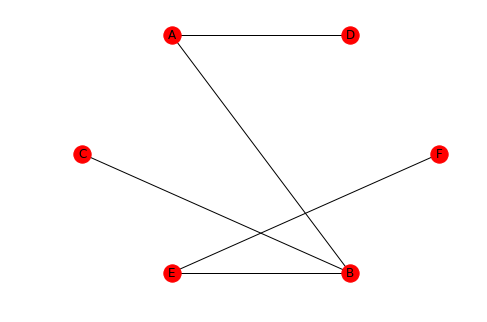

In [4]:
# Creació del MST amb Prim
F = prim(G, 'A')
nx.draw_circular(F, with_labels=True)

for edge in F.edges():
    print([F[edge[0]][edge[1]]['distance'], edge])

<div class="alert alert-info">
<center>
  <h1>Comentarios</h1>
  <p>
  En esta sección tenéis que comentar brevemente (1) __cómo habéis realizado la implementación del algoritmo__ así como un (2) __análisis detallado de la complejidad__ del mismo.
  </p>
</center>
</div>

### _He implementat l'algorisme retornant un Graph predefinit a la llibreria networkx, per compatibilitat amb altres grafs que no siguin els nostres. Podem saber que l'arbre s'ha creat bé si la cardinalitat dels nodes és la cardinalitat dels nodes - 1, és a dir, en un arbre sempre es compleix |V| = |E|-1, perquè no hi ha cicles._

### _En primer lloc, es defineix si hi ha un origen o hem de triar aleatòriament. Com a primera iteració, es definex la cua prioritària amb els veïns del node origen triat. Si els nodes visitats coincideixen amb els nodes totals del graf, llavors hem d'aturar la iteració, perquè ja hem trobat l'arbre mínim._

### _També, podriem haver controlat que la cua prioritària no sigui buida, però el graf paràmetre sempre és connex i per tant no cal fer-ho, perquè si tenim cicles al nostre graf o 1 cicle com a mínim , es donarà el cas, |V|<=|E| i per això sempre hi ha més aristes que nodes en un graf que no sigui un arbre, en cas de passar per paràmetre un arbre, els nodes visitats ja controlen que el graf sortida sigui correcte._

<div class="alert alert-info">
<center>
  <h1>Entrega</h1>
  <p>
  La entrega de esta práctica se realizará a través del __Campus Virtual__. En ella tenéis que incluir únicamente el fichero `.ipynb` sin comprimir con el código debidamente comentado y los comentarios que se os proponen en la anterior sección.
  </p>
  <p>
  El nombre del archivo ha de seguir el formato:
  </p><p style="text-align:center">
  ```
  <apellidos>_<nombre>_EP1.ipynb
  ```
  </p>
</center>
</div>